# Zadanie 3
Klasyfikacja wieloklasowa na podstawie danych Iris:
• Zadanie polega na stworzeniu modelu głębokiej sieci neuronowej w Keras do klasyfikacji
gatunków irysów na podstawie danych z Iris Dataset.
• Użyj bazy danych Iris, która zawiera informacje o długości i szerokości płatków irysów.
• Zdefiniuj bardziej złożoną architekturę modelu, skompiluj go i przeprowadź proces trenowania.
• Wykorzystaj metody oceny na zbiorze testowym oraz zwizualizuj krzywe uczenia.

In [103]:
from sklearn.datasets import load_iris
from sklearn.datasets import load_breast_cancer
from sklearn.metrics import classification_report
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sea

from sklearn.metrics import roc_curve, auc
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

In [104]:
# Wczytanie danych Iris
data = load_iris()
X = data.data
y = data.target

# Podział danych na zbiór treningowy i testowy
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
x_train
y_train

array([0, 0, 1, 0, 0, 2, 1, 0, 0, 0, 2, 1, 1, 0, 0, 1, 2, 2, 1, 2, 1, 2,
       1, 0, 2, 1, 0, 0, 0, 1, 2, 0, 0, 0, 1, 0, 1, 2, 0, 1, 2, 0, 2, 2,
       1, 1, 2, 1, 0, 1, 2, 0, 0, 1, 1, 0, 2, 0, 0, 1, 1, 2, 1, 2, 2, 1,
       0, 0, 2, 2, 0, 0, 0, 1, 2, 0, 2, 2, 0, 1, 1, 2, 1, 2, 0, 2, 1, 2,
       1, 1, 1, 0, 1, 1, 0, 1, 2, 2, 0, 1, 2, 2, 0, 2, 0, 1, 2, 2, 1, 2,
       1, 1, 2, 2, 0, 1, 2, 0, 1, 2])

In [105]:
# Definicja modelu CNN
model = Sequential([
    Dense(8, activation='relu', input_shape=(x_train.shape[1],)),
    Dense(16, activation='relu'),
    Dense(32, activation='relu'),
    Dense(64, activation='relu'),
    Dense(4, activation='softmax')  # 3 klasy w zbiorze danych iris
])

# Kompilacja modelu
model.compile(optimizer='adam',
 loss='sparse_categorical_crossentropy',
 metrics=['accuracy'])

In [106]:
# Trenowanie modelu
history = model.fit(x_train, y_train, epochs=20, validation_data=(x_test, y_test))

# Ocena modelu
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Dokładność klasyfikacji:', test_acc)

Epoch 1/20
4/4 [==============================] - 2s 80ms/step - loss: 1.5538 - accuracy: 0.3417 - val_loss: 1.3799 - val_accuracy: 0.3000
Epoch 2/20
4/4 [==============================] - 0s 17ms/step - loss: 1.3117 - accuracy: 0.3417 - val_loss: 1.2112 - val_accuracy: 0.3000
Epoch 3/20
4/4 [==============================] - 0s 63ms/step - loss: 1.1838 - accuracy: 0.2583 - val_loss: 1.1087 - val_accuracy: 0.3667
Epoch 4/20
4/4 [==============================] - 0s 14ms/step - loss: 1.0989 - accuracy: 0.4167 - val_loss: 1.0392 - val_accuracy: 0.7000
Epoch 5/20
4/4 [==============================] - 0s 15ms/step - loss: 1.0300 - accuracy: 0.6500 - val_loss: 0.9847 - val_accuracy: 0.7000
Epoch 6/20
4/4 [==============================] - 0s 22ms/step - loss: 0.9752 - accuracy: 0.6583 - val_loss: 0.9322 - val_accuracy: 0.7000
Epoch 7/20
4/4 [==============================] - 0s 25ms/step - loss: 0.9246 - accuracy: 0.6583 - val_loss: 0.8805 - val_accuracy: 0.7000
Epoch 8/20
4/4 [===========

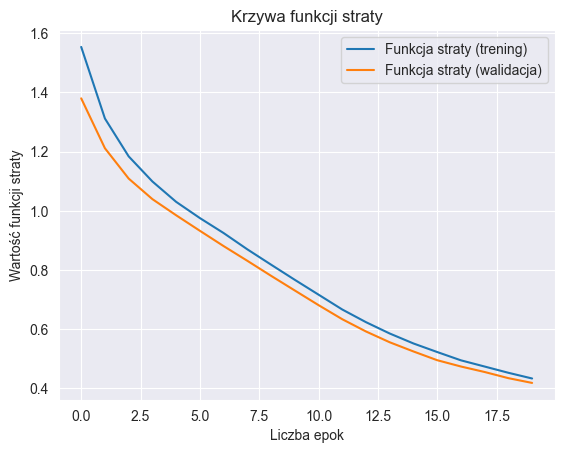

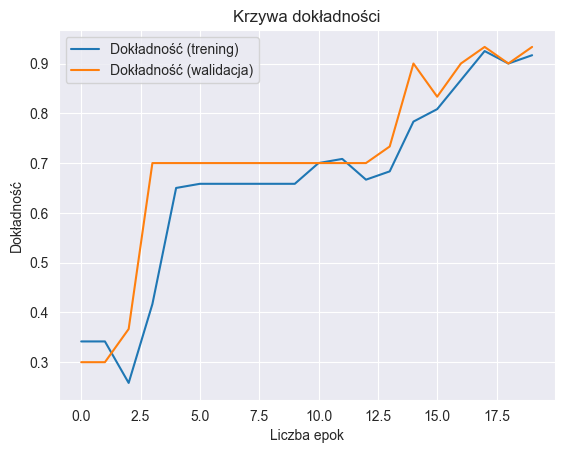

In [107]:
# Wizualizacja krzywych uczenia
plt.plot(history.history['loss'], label='Funkcja straty (trening)')
plt.plot(history.history['val_loss'], label='Funkcja straty (walidacja)')
plt.xlabel('Liczba epok')
plt.ylabel('Wartość funkcji straty')
plt.legend()
plt.title('Krzywa funkcji straty')
plt.show()
plt.plot(history.history['accuracy'], label='Dokładność (trening)')
plt.plot(history.history['val_accuracy'], label='Dokładność (walidacja)')
plt.xlabel('Liczba epok')
plt.ylabel('Dokładność')
plt.legend()
plt.title('Krzywa dokładności')
plt.show()

In [108]:
# Tworzenie Predykcji
y_pred = model.predict(x_test)

1/1 [==============================] - 0s 85ms/step


In [109]:
# Wartości predykcji przed zmianą na binarne
y_pred

array([[3.2935731e-02, 5.1225901e-01, 4.5126307e-01, 3.5422079e-03],
       [9.4556361e-01, 4.3292753e-02, 7.3544974e-03, 3.7891786e-03],
       [1.9747864e-03, 2.7238095e-01, 7.2499365e-01, 6.5065367e-04],
       [4.0590093e-02, 5.0127399e-01, 4.5464337e-01, 3.4925579e-03],
       [1.9425627e-02, 4.8134789e-01, 4.9676752e-01, 2.4589736e-03],
       [9.0555727e-01, 7.1816012e-02, 1.5731730e-02, 6.8950253e-03],
       [1.4105947e-01, 5.2430063e-01, 3.2726192e-01, 7.3779537e-03],
       [1.2522024e-02, 3.8740888e-01, 5.9880102e-01, 1.2681464e-03],
       [1.4761970e-02, 3.9141235e-01, 5.9029615e-01, 3.5295351e-03],
       [6.7495205e-02, 5.3700215e-01, 3.8970754e-01, 5.7950979e-03],
       [2.2160504e-02, 4.4659361e-01, 5.2952451e-01, 1.7212698e-03],
       [8.7445533e-01, 9.1587275e-02, 2.2150608e-02, 1.1806773e-02],
       [9.3070716e-01, 5.2599646e-02, 1.0590731e-02, 6.1024046e-03],
       [8.8250667e-01, 8.6979695e-02, 2.0123214e-02, 1.0390366e-02],
       [9.6400529e-01, 2.8351130e-

In [110]:
y_pred = np.argmax(y_pred, axis=1)
y_pred

array([1, 0, 2, 1, 2, 0, 1, 2, 2, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0], dtype=int64)

[10  7 11]


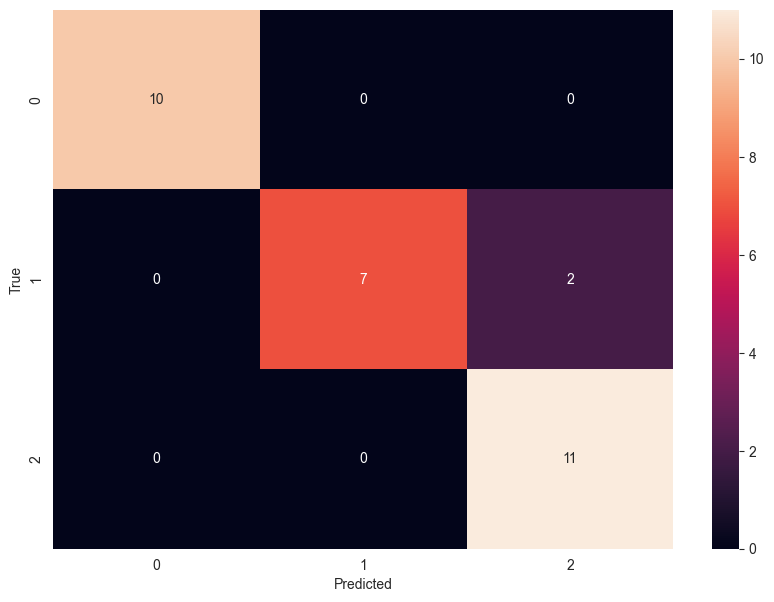

In [111]:
# Obliczenie confusion matrix

cm = confusion_matrix(y_test, y_pred)

print(cm.diagonal())

# Tworzenie DataFrame z confusion matrix
df_cm = pd.DataFrame(cm, index = [i for i in range(3)], columns = [i for i in range(3)])

# Tworzenie heatmapy confusion matrix
plt.figure(figsize = (10,7))
sea.heatmap(df_cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [112]:
# Czułość modelu:
recall = recall_score(y_test, y_pred, average='micro')
print("Czułość modelu: {:.2f}%".format(recall * 100))

# Obliczenie precyzji
precision = precision_score(y_test, y_pred, average='micro')
print("Precyzja modelu: {:.2f}%".format(precision * 100))

# Obliczenie dokładności modelu
accuracy = accuracy_score(y_test, y_pred)
print("Dokładność modelu:", accuracy)

Czułość modelu: 93.33%
Precyzja modelu: 93.33%
Dokładność modelu: 0.9333333333333333
